In [707]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [708]:
experiment = "01_Multiplication" # 506
experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
# framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

data = []
base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [709]:
import pandas as pd


In [710]:
# fl_paths[-1].split("/")[-2]

In [711]:
# runtime/3600

bandwidths(Mbs)
100      0.03
1000     0.02
10000    0.03
25000    0.03
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.02
1000     0.02
10000    0.02
25000    0.02
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.01
1000     0.02
10000    0.02
25000    0.02
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.29
100      0.30
1000     0.21
10000    0.26
25000    0.27
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.13
100      0.14
1000     0.12
10000    0.14
25000    0.13
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.12
100      0.15
1000     0.13
10000    0.12
25000    0.12
Name: runtime_external(s), dtype: float64
500
bandwidths(Mbs)
100      1.78
1000     1.22
10000    1.18
25000    1.19
Name: runtime_external(s), dtype: float64
50
Series([], Name: runtime_external(s), dtype: float64)
500
Series([], Name: runtime_external(s), dtype: float64)
50
bandwidths(Mbs)
100      42.51
1000   

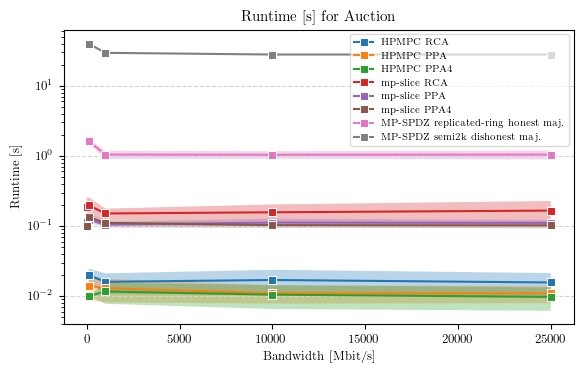

In [712]:
bandwidth,label=rf.get_bandwidth_deviation(data)
del bandwidth[-2] # Auction
del bandwidth[-2]
del label[-2]
del label[-2]

label = ['HPMPC RCA', 'HPMPC PPA', 'HPMPC PPA4', 'mp-slice RCA', 'mp-slice PPA', 'mp-slice PPA4', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ semi2k dishonest maj.']


# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

Series([], Name: runtime_external(s), dtype: float64)
latencies(ms)
0     0.03
25    1.75
50    3.48
75    5.20
Name: runtime_external(s), dtype: float64
Series([], Name: runtime_external(s), dtype: float64)
latencies(ms)
0     0.02
25    0.49
50    0.97
75    1.44
Name: runtime_external(s), dtype: float64
Series([], Name: runtime_external(s), dtype: float64)
latencies(ms)
0     0.02
25    0.34
50    0.66
75    0.99
Name: runtime_external(s), dtype: float64
latencies(ms)
0    0.27
Name: runtime_external(s), dtype: float64
latencies(ms)
0    0.13
Name: runtime_external(s), dtype: float64
latencies(ms)
0    0.12
Name: runtime_external(s), dtype: float64
500
latencies(ms)
0       1.19
25     45.10
50     88.74
75    132.44
Name: runtime_external(s), dtype: float64
50
Series([], Name: runtime_external(s), dtype: float64)
500
Series([], Name: runtime_external(s), dtype: float64)
50
latencies(ms)
0       28.23
25     422.16
50     815.56
75    1209.48
Name: runtime_external(s), dtype: float6

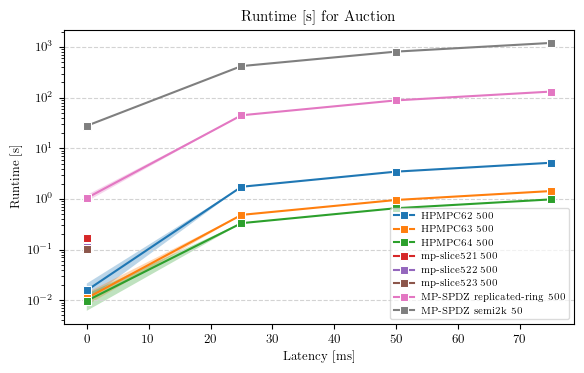

In [713]:
latency,label=rf.get_latency_deviation(data)
del latency[0] # AUCTION
del latency[1]
del latency[2]
del latency[-2]
del latency[-2]
del label[0]
del label[1]
del label[2]
del label[-2]
del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# del latency[-7] # LogReg
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

packetdrops(%)
0.0    0.03
1.0    1.85
2.0    2.73
5.0    3.08
Name: runtime_external(s), dtype: float64
packetdrops(%)
0.0    0.02
1.0    1.02
2.0    2.81
5.0    3.45
Name: runtime_external(s), dtype: float64
packetdrops(%)
0.0    0.02
1.0    1.03
2.0    1.03
5.0    3.24
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.3
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.14
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.15
Name: runtime_external(s), dtype: float64
packetdrops(%)
0     1.19
1     6.73
2     9.96
5    26.62
Name: runtime_external(s), dtype: float64
Series([], Name: runtime_external(s), dtype: float64)
Series([], Name: runtime_external(s), dtype: float64)
packetdrops(%)
0     28.23
1     62.21
2    107.62
5    306.21
Name: runtime_external(s), dtype: float64


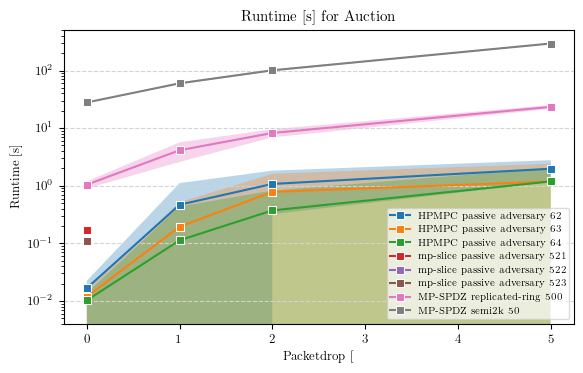

In [714]:
packetdrop,label=rf.get_packetdrop_deviation(data)
del packetdrop[-2] # Auction
del packetdrop[-2]
del label[-2]
del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
# print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [%]","Runtime [s]",True)

In [715]:
bandwidth,label=rf.get_bandwidth_deviation(data)
del bandwidth[-2] # Auction
del bandwidth[-2]
del label[-2]
del label[-2]
# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

[df['mean'].iloc[0] for df in bandwidth]

bandwidths(Mbs)
100      0.03
1000     0.02
10000    0.03
25000    0.03
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.02
1000     0.02
10000    0.02
25000    0.02
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.01
1000     0.02
10000    0.02
25000    0.02
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.29
100      0.30
1000     0.21
10000    0.26
25000    0.27
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.13
100      0.14
1000     0.12
10000    0.14
25000    0.13
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.12
100      0.15
1000     0.13
10000    0.12
25000    0.12
Name: runtime_external(s), dtype: float64
500
bandwidths(Mbs)
100      1.78
1000     1.22
10000    1.18
25000    1.19
Name: runtime_external(s), dtype: float64
50
Series([], Name: runtime_external(s), dtype: float64)
500
Series([], Name: runtime_external(s), dtype: float64)
50
bandwidths(Mbs)
100      42.51
1000   

[0.02,
 0.014000000000000002,
 0.01,
 0.189,
 0.11300000000000002,
 0.101,
 1.621,
 39.928]

In [716]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.004714045207910317,
 0.0051639777949432225,
 0.0,
 0.06505553183413552,
 0.013374935098492587,
 0.009944289260117532,
 0.09700515450222218,
 0.9278864873104535]

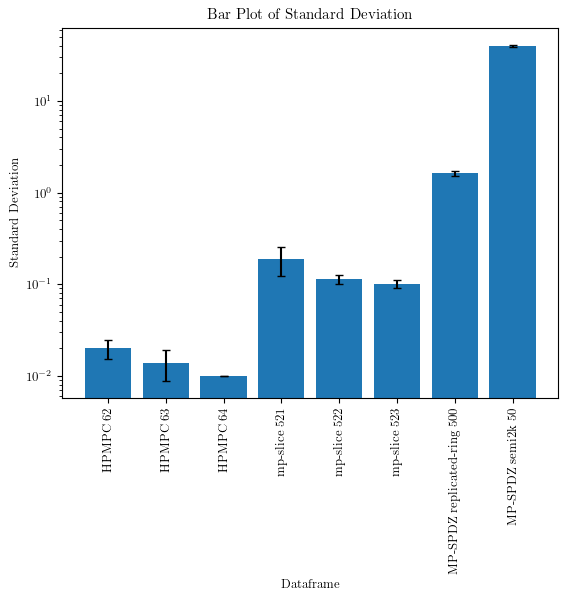

In [717]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


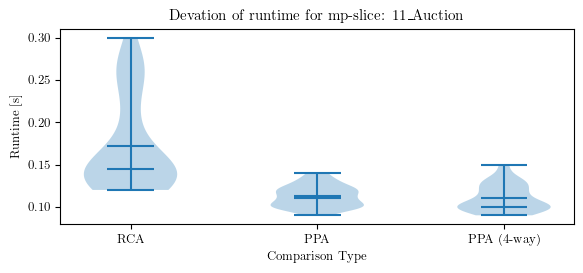

In [718]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example data
fig, ax = plt.subplots()

pos = 1
deviation61 = data[pos].loc[(data[pos]['function'] == 521) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation62 = data[pos].loc[(data[pos]['function'] == 522)  & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation63 = data[pos].loc[(data[pos]['function'] == 523) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()

# Plot the first violin plot
two_dimensional_list = [deviation61, deviation62, deviation63]
ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# Set the x-tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])


# Set plot title and labels
plt.title(f"Devation of runtime for {framworks[pos]}: {experiment}")
plt.xlabel("Comparison Type")
plt.ylabel("Runtime [s]")
ax.figure.set_size_inches(5.91, 2.8)
fig.tight_layout()
plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
plt.show()